In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("Faces_Dataset.csv",  header=None)
df.dropna(inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,tVal2,tVal3,tVal4,tVal5,tVal6,tVal7,ax,ay,az,gx,gy,gz,face
1,0,1,0,0,1,1,0.01,0.08,-1.11,-447.89,2478.91,-131.51,1
2,0,1,0,0,1,1,-0.08,0.07,-1.19,-235.73,4220.85,-342.43,1
3,0,1,0,0,1,1,-0.03,0.01,-1.17,-1901.99,952.85,315.14,1
4,0,1,0,0,1,1,-0.01,0.02,-1.08,261.79,800.25,306.45,1


In [21]:
df.columns = df.iloc[0]
df = df[1:]

In [22]:
df.columns = ['t1','t2','t3','t4','t5','t6','ax','ay','az','gx','gy','gz','f']
df.head()

,t1,t2,t3,t4,t5,t6,ax,ay,az,gx,gy,gz,f
1,0,1,0,0,1,1,0.01,0.08,-1.11,-447.89,2478.91,-131.51,1
2,0,1,0,0,1,1,-0.08,0.07,-1.19,-235.73,4220.85,-342.43,1
3,0,1,0,0,1,1,-0.03,0.01,-1.17,-1901.99,952.85,315.14,1
4,0,1,0,0,1,1,-0.01,0.02,-1.08,261.79,800.25,306.45,1
5,0,1,0,0,1,1,-0.07,0.00,-1.17,2895.78,-756.82,-870.97,1


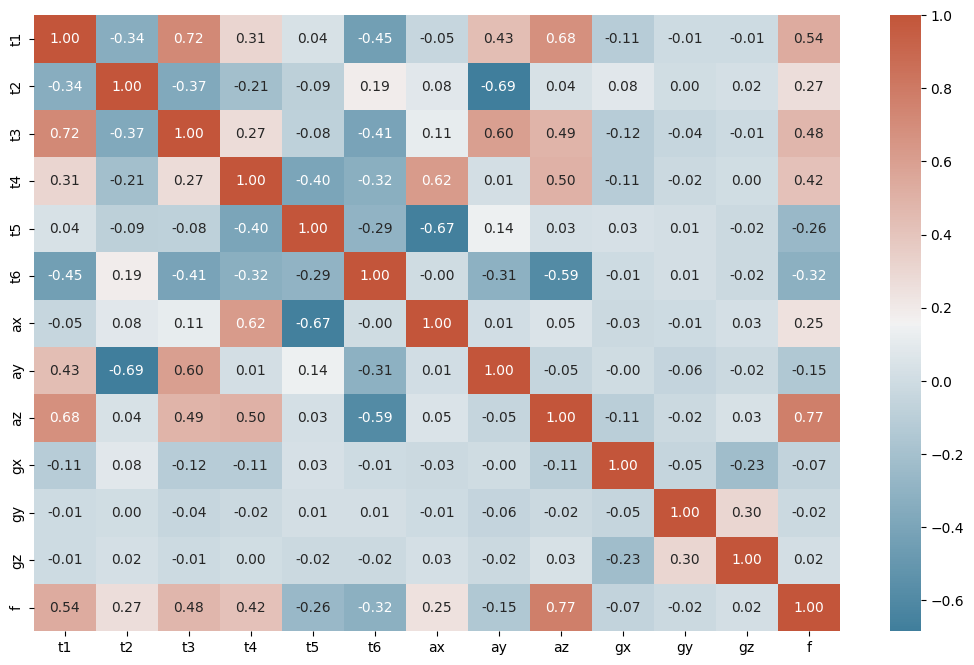

In [23]:
plt.figure(figsize=(13,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap ) 
plt.show()

In [24]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [25]:
X_train

,t1,t2,t3,t4,t5,t6,ax,ay,az,gx,gy,gz
956,1,0,1,1,1,1,-0.36,1.08,-0.13,2353.62,-607.61,3105.52
1008,0,1,0,1,0,1,0.70,-0.63,-0.21,-751.27,-26.46,-2666.21
656,1,0,1,1,1,1,-0.14,0.98,-0.10,-2940.61,-351.90,-601.72
2344,0,1,1,1,0,1,1.04,-0.07,-0.40,62.20,239.64,1207.12
800,1,1,1,1,1,0,0.37,0.81,0.25,3071.66,-1816.44,1066.26
...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1,1,1,0,1,1,-1.11,-0.07,0.00,-178.53,373.87,-670.06
1103,0,1,0,1,1,1,-0.53,-0.99,-0.25,-392.13,-1459.41,1659.60
1138,1,1,0,1,0,1,0.52,-0.83,0.43,2550.57,62.89,-656.59
1303,0,1,0,1,1,1,-0.12,-0.97,-0.47,1489.48,-422.03,1776.45


In [26]:
y_train

956     2
1008    3
656     2
2344    5
800     2
       ..
1649    4
1103    3
1138    3
1303    3
867     2
Name: f, Length: 2284, dtype: object

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 1 to 2874
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   t1      2856 non-null   object
 1   t2      2856 non-null   object
 2   t3      2856 non-null   object
 3   t4      2856 non-null   object
 4   t5      2856 non-null   object
 5   t6      2856 non-null   object
 6   ax      2856 non-null   object
 7   ay      2856 non-null   object
 8   az      2856 non-null   object
 9   gx      2856 non-null   object
 10  gy      2856 non-null   object
 11  gz      2856 non-null   object
 12  f       2856 non-null   object
dtypes: object(13)
memory usage: 312.4+ KB


In [41]:
df.describe()  

,t1,t2,t3,t4,t5,t6,ax,ay,az,gx,gy,gz,f
count,2856,2856,2856,2856,2856,2856,2856,2856,2856,2856,2856,2856,2856
unique,2,2,2,2,2,2,248,249,235,2813,2794,2796,6
top,1,1,1,1,1,1,0.02,0.10,-1.14,-174.04,-1771.13,1388.34,1
freq,1931,2283,1832,1915,2164,2019,50,42,97,2,6,3,476


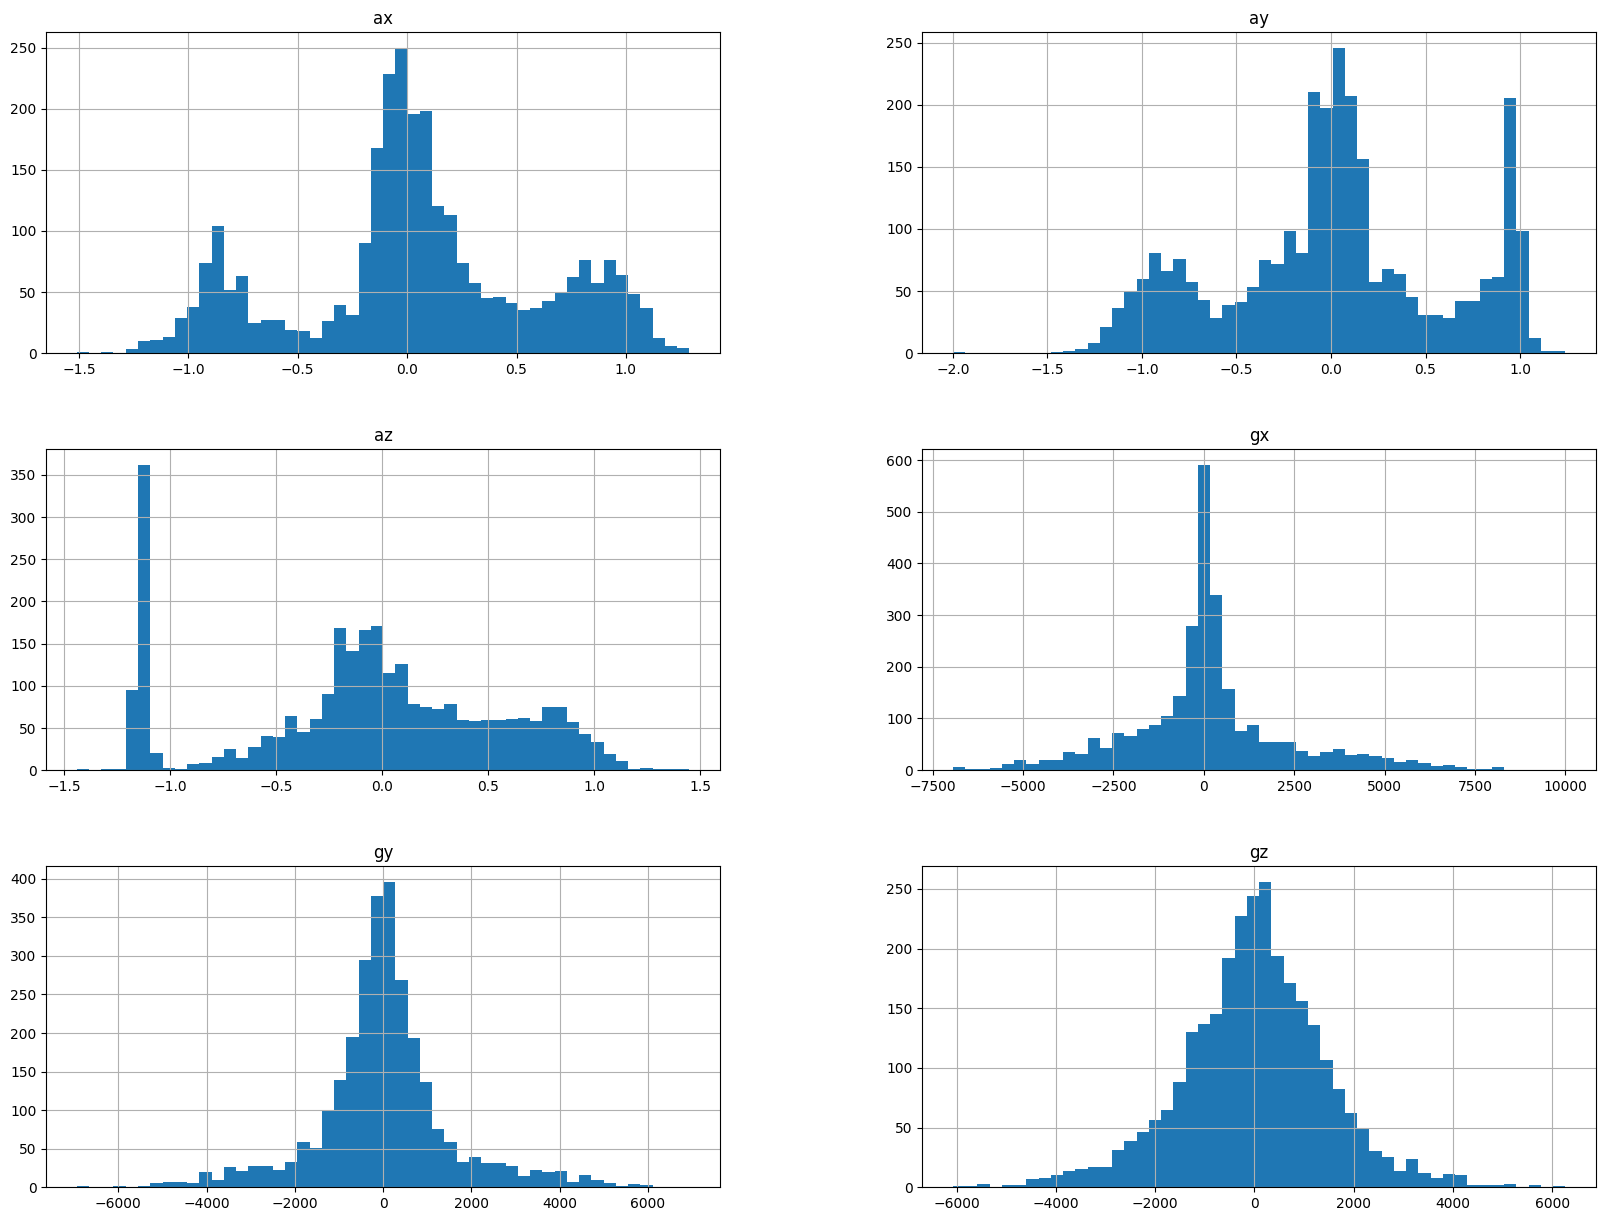

In [45]:
# generamos una matriz con los histogramas de cada columna
%matplotlib inline
import matplotlib.pyplot as plt

numeric_columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
# Convertir las columnas numéricas a tipo float
df[numeric_columns] = df[numeric_columns].astype(float)
# Generar histogramas para las columnas numéricas
df[numeric_columns].hist(bins=50, figsize=(20, 15))
plt.show()

In [27]:
X_test

,t1,t2,t3,t4,t5,t6,ax,ay,az,gx,gy,gz
1593,1,1,1,0,1,1,-0.97,-0.15,0.01,28.81,-435.49,144.80
1756,1,1,1,0,1,1,-1.12,0.12,-0.16,-224.15,191.45,-909.78
778,1,0,1,1,1,1,-0.09,0.65,-0.76,-2853.74,-311.17,24.79
2337,1,1,1,1,0,1,1.09,0.76,-0.17,45.30,388.91,921.13
391,0,1,0,0,1,1,-0.07,0.17,-1.12,3111.66,-3344.91,-2836.23
...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,1,0,0,1,1,-0.12,-0.05,-1.12,4605.46,1310.17,775.43
2839,1,1,1,1,1,0,-0.35,0.21,0.73,-3363.49,-1120.81,46.82
255,0,1,0,0,1,1,-0.11,-0.11,-1.12,-1754.34,4952.86,1887.10
1801,1,1,1,0,1,1,-1.51,-0.07,0.54,235.71,-178.58,479.05


In [28]:
#Linear regression model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [36]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.92
Accuracy of Logistic regression classifier on test set: 0.94


In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.96


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.62


# Classification Report. Logistic Regression

In [32]:
predictions = logreg.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99       101
           2       0.99      0.95      0.97        93
           3       0.91      0.93      0.92        91
           4       0.98      0.91      0.95        94
           5       0.91      0.89      0.90        87
           6       0.87      0.92      0.89       106

    accuracy                           0.94       572
   macro avg       0.94      0.93      0.94       572
weighted avg       0.94      0.94      0.94       572



# Classification Report. Decision Tree Classifier

In [33]:
predictions = clf.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       101
           2       0.98      1.00      0.99        93
           3       0.93      0.96      0.94        91
           4       1.00      0.97      0.98        94
           5       0.92      0.87      0.89        87
           6       0.93      0.94      0.93       106

    accuracy                           0.96       572
   macro avg       0.96      0.96      0.96       572
weighted avg       0.96      0.96      0.96       572



# Classification Report. K-Neighbors

In [34]:
predictions = knn.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.73      0.88      0.80       101
           2       0.60      0.70      0.64        93
           3       0.66      0.54      0.59        91
           4       0.56      0.79      0.66        94
           5       0.60      0.51      0.55        87
           6       0.54      0.32      0.40       106

    accuracy                           0.62       572
   macro avg       0.62      0.62      0.61       572
weighted avg       0.62      0.62      0.61       572



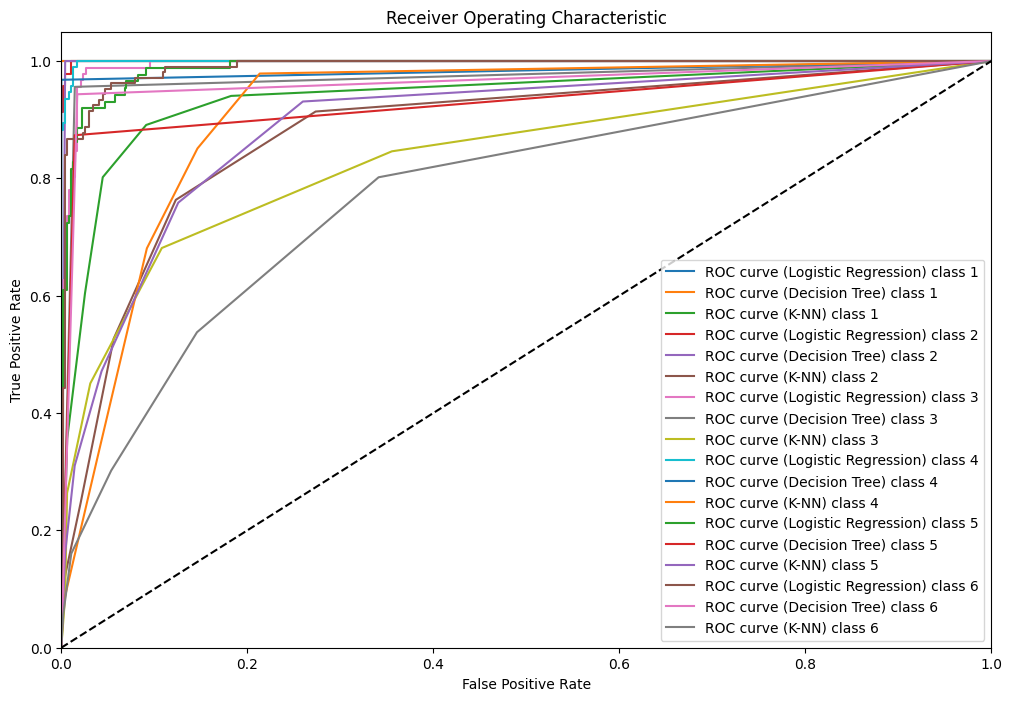

In [53]:
# Binariza las etiquetas para la curva ROC
y_test_bin = label_binarize(y_test, classes=['1', '2', '3', '4', '5', '6'])
n_classes = y_test_bin.shape[1]
# Gráfica de las Curvas ROC
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(logreg_fpr[i], logreg_tpr[i], label='ROC curve (Logistic Regression) class {}'.format(i+1))
    plt.plot(clf_fpr[i], clf_tpr[i], label='ROC curve (Decision Tree) class {}'.format(i+1))
    plt.plot(knn_fpr[i], knn_tpr[i], label='ROC curve (K-NN) class {}'.format(i+1))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


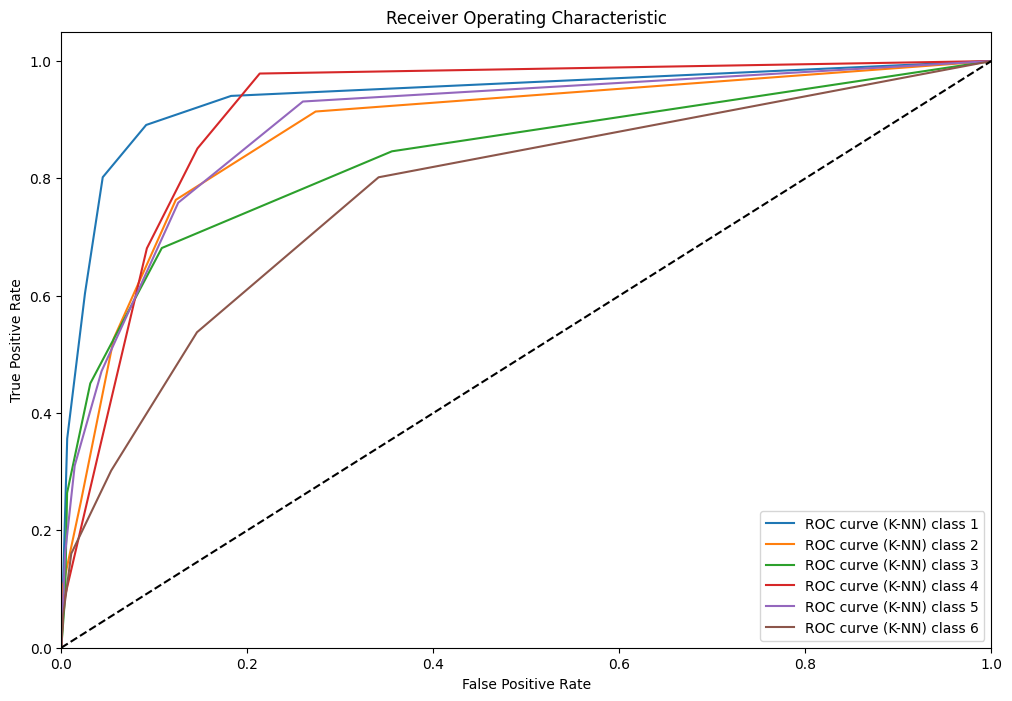

In [50]:
# Binariza las etiquetas para la curva ROC
y_test_bin = label_binarize(y_test, classes=['1', '2', '3', '4', '5', '6'])
n_classes = y_test_bin.shape[1]
# Gráfica de las Curvas ROC
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(knn_fpr[i], knn_tpr[i], label='ROC curve (K-NN) class {}'.format(i+1))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

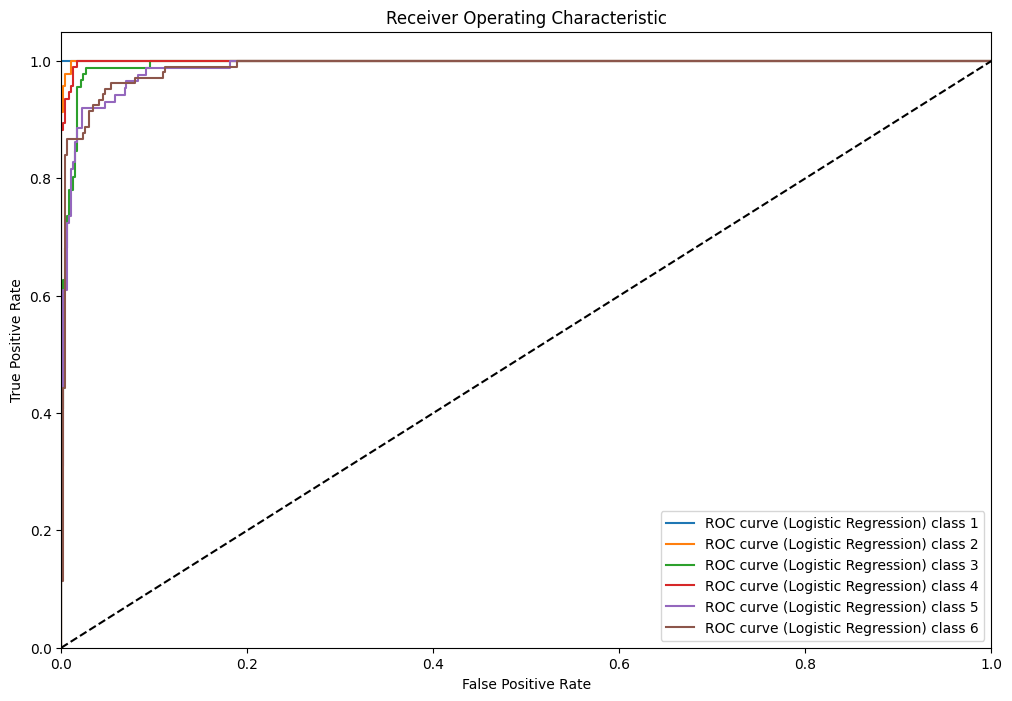

In [51]:
# Binariza las etiquetas para la curva ROC
y_test_bin = label_binarize(y_test, classes=['1', '2', '3', '4', '5', '6'])
n_classes = y_test_bin.shape[1]
# Gráfica de las Curvas ROC
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(logreg_fpr[i], logreg_tpr[i], label='ROC curve (Logistic Regression) class {}'.format(i+1))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

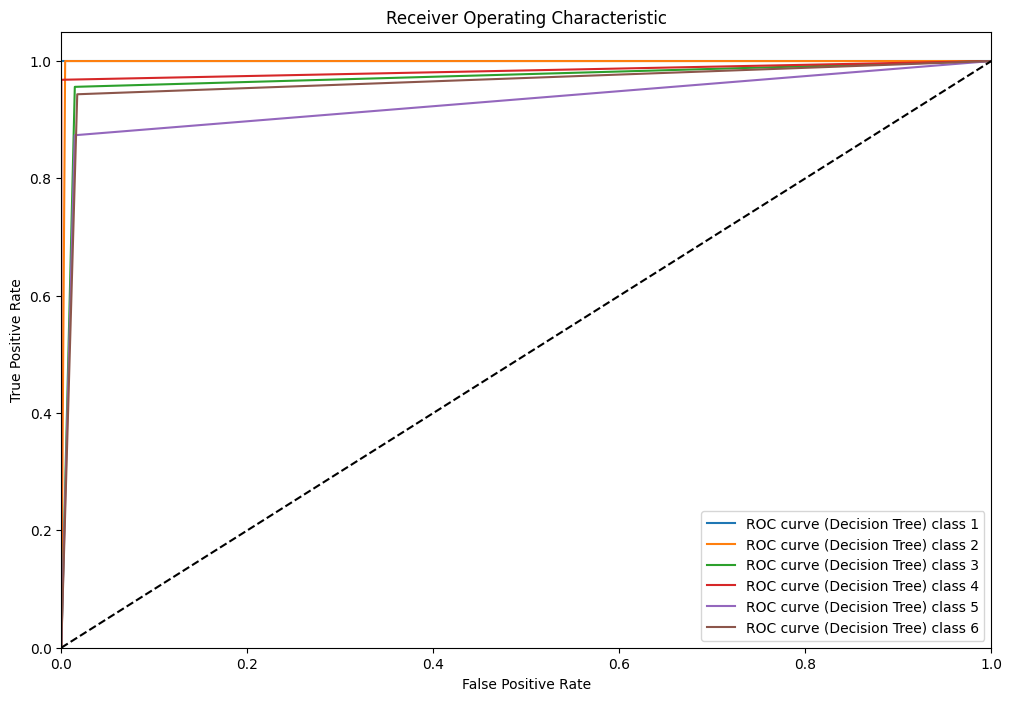

In [52]:
# Binariza las etiquetas para la curva ROC
y_test_bin = label_binarize(y_test, classes=['1', '2', '3', '4', '5', '6'])
n_classes = y_test_bin.shape[1]
# Gráfica de las Curvas ROC
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(clf_fpr[i], clf_tpr[i], label='ROC curve (Decision Tree) class {}'.format(i+1))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()